In [124]:
# !pip install pyjwt==1.6.4
import getCoinInfo

import os
import jwt
import uuid
import hashlib
from urllib.parse import urlencode
import pandas as pd
import matplotlib.pyplot as plt

import requests
import warnings
warnings.filterwarnings('ignore')

In [125]:
#secretKey = '9YJKW1Mf2sbxS49CxK64mAcg1K2jWQlz6nBj03xR'
#accessKey = 'D3lErjSf7TR51Gf79eCC9hwsZBkPajT9lOPxQxsr'

accessKey = '0OZyHGPI4paErDy83m2T0XtXLPZlVL2xbafNpadp'
secretKey = 'V3SPlDriFU1StpEtSIgtfGoiQ9de2hKqkjDkw0wx'

In [126]:
server_url = 'https://api.upbit.com'

payload = {
    'access_key': accessKey,
    'nonce': str(uuid.uuid4()),
}

jwt_token = jwt.encode(payload, secretKey)
authorize_token = 'Bearer {}'.format(jwt_token)
headers = {"Authorization": authorize_token}

res = requests.get(server_url + "/v1/accounts", headers=headers)

print(res.json())

{'error': {'message': '인증된 IP가 아닙니다.', 'name': 'no_authorization_i_p'}}


In [127]:
#종목 조회
url = "https://api.upbit.com/v1/market/all"

querystring = {"isDetails":"false"}

response = requests.request("GET", url, params=querystring)

coin_list = response.json()
coins = []
for coin in coin_list:
    if coin['market'].split('-')[0] =='KRW':
        coins.append(coin['market'])
len(coins)

112

In [128]:
url = "https://api.upbit.com/v1/candles/days"

query = {"count":"1","market": "KRW-BTC"}
# m = hashlib.sha512()
# m.update(urlencode(query).encode())
# query_hash = m.hexdigest()
# payload = {
#     'access_key': accessKey,
#     'nonce': str(uuid.uuid4()),
#     'query_hash': query_hash,
#     'query_hash_alg': 'SHA512'
# }

# jwt_token = jwt.encode(payload, secretKey)
# authorize_token = 'Bearer {}'.format(jwt_token)
# headers = {"Authorization": authorize_token}

response = requests.request("GET", url, params =  query)

print(response.text)

[{"market":"KRW-BTC","candle_date_time_utc":"2021-06-21T00:00:00","candle_date_time_kst":"2021-06-21T09:00:00","opening_price":41843000.00000000,"high_price":42048000.00000000,"low_price":38523000.00000000,"trade_price":38730000.00000000,"timestamp":1624260703075,"candle_acc_trade_price":327245699503.79245000,"candle_acc_trade_volume":8159.70260113,"prev_closing_price":41842000.00000000,"change_price":-3112000.00000000,"change_rate":-0.0743750299}]


In [129]:
import socket
socket.gethostbyname(socket.getfqdn())

'192.168.219.102'

In [170]:
df = {}
for coin in coins:
    print(coin)
    df[coin] = getCoinInfo.getCoinDF(coin,30,200,size=24*2*7)
  
df['KRW-BTC']

KRW-BTC
KRW-ETH
KRW-NEO
KRW-MTL
KRW-LTC
KRW-XRP
KRW-ETC
KRW-OMG
KRW-SNT
KRW-WAVES
KRW-XEM
KRW-QTUM
KRW-LSK
KRW-STEEM
KRW-XLM
KRW-ARDR
KRW-KMD
KRW-ARK
KRW-STORJ
KRW-GRS
KRW-REP
KRW-EMC2
KRW-ADA
KRW-SBD
KRW-POWR
KRW-BTG
KRW-ICX
KRW-EOS
KRW-TRX
KRW-SC
KRW-IGNIS
KRW-ONT
KRW-ZIL
KRW-POLY
KRW-ZRX
KRW-LOOM
KRW-BCH
KRW-ADX
KRW-BAT
KRW-IOST
KRW-DMT
KRW-RFR
KRW-CVC
KRW-IQ
KRW-IOTA
KRW-MFT
KRW-ONG
KRW-GAS
KRW-UPP
KRW-ELF
KRW-KNC
KRW-BSV
KRW-THETA
KRW-EDR
KRW-QKC
KRW-BTT
KRW-MOC
KRW-ENJ
KRW-TFUEL
KRW-MANA
KRW-ANKR
KRW-AERGO
KRW-ATOM
KRW-TT
KRW-CRE
KRW-MBL
KRW-TSHP
KRW-WAXP
KRW-HBAR
KRW-MED
KRW-MLK
KRW-STPT
KRW-ORBS
KRW-VET
KRW-CHZ
KRW-PXL
KRW-STMX
KRW-DKA
KRW-HIVE
KRW-KAVA
KRW-AHT
KRW-LINK
KRW-XTZ
KRW-BORA
KRW-JST
KRW-CRO
KRW-TON
KRW-SXP
KRW-LAMB
KRW-HUNT
KRW-PLA
KRW-DOT
KRW-SRM
KRW-MVL
KRW-STRAX
KRW-AQT
KRW-BCHA
KRW-GLM
KRW-SSX
KRW-META
KRW-FCT2
KRW-LBC
KRW-CBK
KRW-SAND
KRW-HUM
KRW-DOGE
KRW-STRK
KRW-PUNDIX
KRW-FLOW
KRW-DAWN
KRW-AXS
KRW-STX


,market,candle_date_time_utc,candle_date_time_kst,opening_price,high_price,low_price,trade_price,timestamp,candle_acc_trade_price,candle_acc_trade_volume,unit
0,KRW-BTC,2021-06-21T07:30:00,2021-06-21T16:30:00,38805000,38999000,38650000,38865000,2021-06-21 07:41:11.638,7.877724e+09,202.959064,30
1,KRW-BTC,2021-06-21T07:00:00,2021-06-21T16:00:00,38890000,39299000,38654000,38805000,2021-06-21 07:29:59.448,2.763776e+10,708.530422,30
2,KRW-BTC,2021-06-21T06:30:00,2021-06-21T15:30:00,39409000,39417000,38523000,38883000,2021-06-21 06:59:59.996,7.947628e+10,2036.872414,30
3,KRW-BTC,2021-06-21T06:00:00,2021-06-21T15:00:00,40396000,40470000,39400000,39400000,2021-06-21 06:30:01.449,3.006488e+10,752.241280,30
4,KRW-BTC,2021-06-21T05:30:00,2021-06-21T14:30:00,40110000,40440000,40077000,40396000,2021-06-21 05:59:59.810,2.388321e+10,593.498803,30
...,...,...,...,...,...,...,...,...,...,...,...
395,KRW-BTC,2021-06-13T02:30:00,2021-06-13T11:30:00,41262000,41307000,41060000,41102000,2021-06-13 02:59:58.724,5.566047e+09,135.160446,30
396,KRW-BTC,2021-06-13T02:00:00,2021-06-13T11:00:00,41572000,41598000,41200000,41306000,2021-06-13 02:29:57.420,6.350933e+09,153.492156,30
397,KRW-BTC,2021-06-13T01:30:00,2021-06-13T10:30:00,41417000,41624000,41364000,41572000,2021-06-13 01:59:59.842,6.681405e+09,161.145063,30
398,KRW-BTC,2021-06-13T01:00:00,2021-06-13T10:00:00,41545000,41701000,41301000,41402000,2021-06-13 01:29:59.991,9.600755e+09,231.219614,30


In [171]:
for coin in coins:
    df[coin] = df[coin].loc[::-1,:]
    df[coin] = df[coin].reset_index()
    df[coin].drop('index',inplace=True,axis=1)

In [172]:
df['KRW-TFUEL']

,market,candle_date_time_utc,candle_date_time_kst,opening_price,high_price,low_price,trade_price,timestamp,candle_acc_trade_price,candle_acc_trade_volume,unit
0,KRW-TFUEL,2021-06-13T00:30:00,2021-06-13T09:30:00,488,508,480,498,2021-06-13 00:59:55.829,2.526265e+09,5.095448e+06,30
1,KRW-TFUEL,2021-06-13T01:00:00,2021-06-13T10:00:00,498,507,492,506,2021-06-13 01:29:56.795,1.523994e+09,3.052685e+06,30
2,KRW-TFUEL,2021-06-13T01:30:00,2021-06-13T10:30:00,507,510,496,498,2021-06-13 01:59:55.384,1.631830e+09,3.260594e+06,30
3,KRW-TFUEL,2021-06-13T02:00:00,2021-06-13T11:00:00,498,504,495,504,2021-06-13 02:29:58.763,9.797909e+08,1.961296e+06,30
4,KRW-TFUEL,2021-06-13T02:30:00,2021-06-13T11:30:00,504,511,497,506,2021-06-13 02:59:56.698,2.040498e+09,4.043478e+06,30
...,...,...,...,...,...,...,...,...,...,...,...
395,KRW-TFUEL,2021-06-21T05:30:00,2021-06-21T14:30:00,682,699,682,694,2021-06-21 05:59:56.270,4.926634e+09,7.107990e+06,30
396,KRW-TFUEL,2021-06-21T06:00:00,2021-06-21T15:00:00,694,698,680,680,2021-06-21 06:29:59.490,5.021247e+09,7.267231e+06,30
397,KRW-TFUEL,2021-06-21T06:30:00,2021-06-21T15:30:00,681,683,656,669,2021-06-21 06:59:55.156,1.843396e+10,2.751219e+07,30
398,KRW-TFUEL,2021-06-21T07:00:00,2021-06-21T16:00:00,668,681,659,663,2021-06-21 07:29:59.469,1.216145e+10,1.812489e+07,30


In [173]:
df_tier = pd.DataFrame(columns=['coin','rate','trade_price'])
df_tier['coin'] = coins
df_tier.set_index('coin',inplace=True)

In [192]:
for coin in coins:
    df_tier['rate'].loc[coin]= (df[coin]['trade_price'].loc[len(df[coin])-1] - df[coin]['opening_price'].loc[0])/df[coin]['opening_price'].loc[0] * 100
    df_tier['trade_price'].loc[coin] = df[coin]['candle_acc_trade_price'].mean()/pow(10,8)
    df_tier['tier_val'] = 10*df_tier['rate'] + df_tier['trade_price']
df_tier = df_tier.sort_values(by='tier_val',ascending=False)
df_tier[:20]

,rate,trade_price,tier_val,tier
coin,,,,
KRW-TFUEL,36.47541,49.375049,414.129148,0
KRW-SXP,26.785714,3.549784,271.406927,3
KRW-WAVES,17.867959,6.47269,185.152278,3
KRW-KAVA,8.210784,1.889552,83.997395,2
KRW-BTC,-5.237364,120.000371,67.626733,2
KRW-THETA,3.186138,4.907952,36.769327,2
KRW-AXS,1.851852,1.742776,20.261295,2
KRW-CHZ,-0.96463,24.306341,14.660039,2
KRW-ICX,0.0,1.042962,1.042962,2


In [193]:
import sklearn
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10, random_state=0).fit(df_tier[['tier_val']])
df_tier['tier'] = kmeans.labels_


tier_dict = {}
tier_num = 0

global tier_num

def getTier(x,tier_dict):
    global tier_num
    if not tier_dict.get(x):
        tier_dict[x] = tier_num
        tier_num+=1
    return tier_dict[x]

df_tier['tier']=df_tier['tier'].map(lambda x : getTier(x,tier_dict))
df_tier = df_tier.sort_values(by='tier')
df_tier[:20]

,rate,trade_price,tier_val,tier
coin,,,,
KRW-TFUEL,36.47541,49.375049,414.129148,0
KRW-SXP,26.785714,3.549784,271.406927,1
KRW-WAVES,17.867959,6.47269,185.152278,1
KRW-ZIL,-1.769912,1.494758,-16.204358,2
KRW-RFR,-1.785714,3.350401,-14.506741,2
KRW-ICX,0.0,1.042962,1.042962,2
KRW-CHZ,-0.96463,24.306341,14.660039,2
KRW-MVL,-0.934579,9.590877,0.245083,2
KRW-THETA,3.186138,4.907952,36.769327,2


<AxesSubplot:xlabel='rate', ylabel='trade_price'>

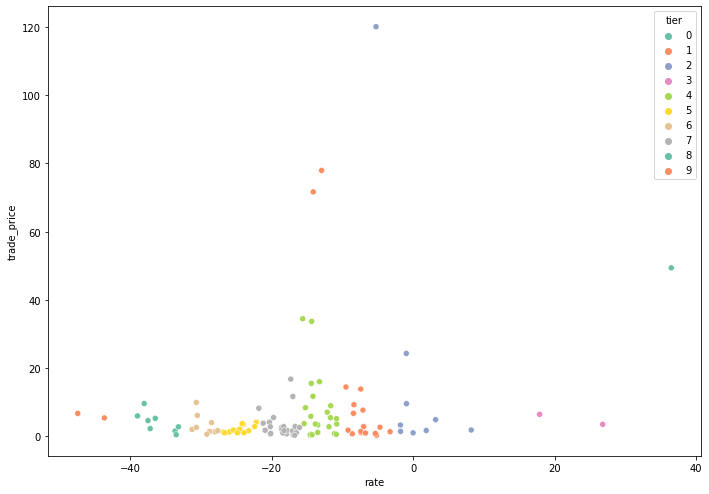

In [191]:
import seaborn as sns
import matplotlib.pyplot as plt

a4_dims = (11.7, 8.27)

fig, ax = plt.subplots(figsize=a4_dims)

sns.scatterplot(ax=ax,x='rate', y='trade_price', hue='tier', data=df_tier, palette="Set2")